1. Pengenalan SVM

    Support Vector Machine (SVM) merupakan salah satu metode dalam supervised learning yang biasanya digunakan untuk klasifikasi (seperti Support Vector Classification) dan regresi (Support Vector Regression). Dalam pemodelan klasifikasi, SVM memiliki konsep yang lebih matang dan lebih jelas secara matematis dibandingkan dengan teknik-teknik klasifikasi lainnya. SVM juga dapat mengatasi masalah klasifikasi dan regresi dengan linear maupun non linear.

2. Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


3. Load Dataset

In [3]:
df = pd.read_csv ('KIND.csv')
df

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,76,66,86,66,85,48,97,1885,1970,0.13,0.16,5.09
1,2014-7-2,71,63,79,66,85,50,99,1904,1970,0.00,0.16,4.50
2,2014-7-3,67,60,73,66,85,49,100,1968,1911,0.00,0.15,1.89
3,2014-7-4,67,54,79,66,85,48,103,1968,1911,0.00,0.15,2.40
4,2014-7-5,69,59,79,66,85,49,103,1972,2012,0.00,0.16,3.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-6-26,71,66,76,65,85,49,102,1979,1954,1.57,0.14,3.09
361,2015-6-27,66,60,72,65,85,48,100,1926,1934,0.00,0.14,2.79
362,2015-6-28,67,55,78,65,85,50,104,1950,2012,0.09,0.15,1.65
363,2015-6-29,70,63,77,65,85,48,103,1923,2012,0.21,0.14,1.63


In [4]:
df.tail()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
360,2015-6-26,71,66,76,65,85,49,102,1979,1954,1.57,0.14,3.09
361,2015-6-27,66,60,72,65,85,48,100,1926,1934,0.00,0.14,2.79
362,2015-6-28,67,55,78,65,85,50,104,1950,2012,0.09,0.15,1.65
363,2015-6-29,70,63,77,65,85,48,103,1923,2012,0.21,0.14,1.63
364,2015-6-30,73,64,82,65,85,46,97,1943,1933,0.00,0.14,1.50


In [5]:
df.shape

(365, 13)

In [6]:
df.size

4745

In [9]:
df.count()

date                     365
actual_mean_temp         365
actual_min_temp          365
actual_max_temp          365
average_min_temp         365
average_max_temp         365
record_min_temp          365
record_max_temp          365
record_min_temp_year     365
record_max_temp_year     365
actual_precipitation     365
average_precipitation    365
record_precipitation     365
dtype: int64

In [13]:
df['record_precipitation'].value_counts()

1.56    7
1.65    6
1.90    6
1.58    5
1.48    5
       ..
2.22    1
2.62    1
1.88    1
2.48    1
4.50    1
Name: record_precipitation, Length: 192, dtype: int64

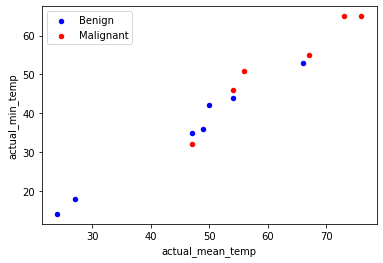

In [17]:
benign_df = df[df['record_precipitation']==1.56][0:200]
malignant_df = df[df['record_precipitation']==1.65][0:20]

axes = benign_df.plot(kind='scatter', x='actual_mean_temp', y='actual_min_temp', color='blue', label='Benign')

malignant_df.plot(kind='scatter', x='actual_mean_temp', y='actual_min_temp', color='red', label='Malignant', ax=axes)


#help(benign_df.plot)

In [18]:
df.dtypes 

date                      object
actual_mean_temp           int64
actual_min_temp            int64
actual_max_temp            int64
average_min_temp           int64
average_max_temp           int64
record_min_temp            int64
record_max_temp            int64
record_min_temp_year       int64
record_max_temp_year       int64
actual_precipitation     float64
average_precipitation    float64
record_precipitation     float64
dtype: object

In [21]:
df.columns

Index(['date', 'actual_mean_temp', 'actual_min_temp', 'actual_max_temp',
       'average_min_temp', 'average_max_temp', 'record_min_temp',
       'record_max_temp', 'record_min_temp_year', 'record_max_temp_year',
       'actual_precipitation', 'average_precipitation',
       'record_precipitation'],
      dtype='object')

In [24]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

# Fitting the classifier into the Training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

# Predicting the test set results

Y_Pred = classifier.predict(X_Test)

# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)

# Visualising the Training set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Actual Mean Temp')
plt.ylabel('Actual Min Temp')
plt.legend()
plt.show()

# Visualising the Test set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Actual Mean Temp')
plt.ylabel('Actuam Min Temp')
plt.legend()
plt.show()

NameError: ignored

Sumber Dataset : https://github.com/fivethirtyeight/data/blob/master/us-weather-history/KIND.csv
Sumber Code : https://www.youtube.com/watch?v=7sz4WpkUIIs&feature=youtu.be